0.0004000400040002905


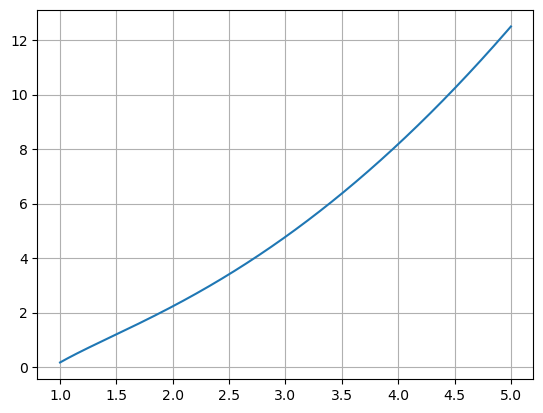

In [9]:
# Author: Carlos eduardo da Silva Lima
# Solving EDO initial value problem (IVP) via scipy and 4Order Runge-Kutta
# 4Order Runge-Kutta

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
    
# Initial conditions
N = 10000
t = np.linspace(1.0, 5.0, N)
alpha_0 = 2.0
alpha_1 = 1.0
c2 = alpha_0/(12*alpha_1)
c3 = 1.0
t_initial = 1.0
t_final = 5.0
y0  = 1.0+c2-c3
u0  = 2*c2+2*c3
h   = t[1]-t[0]
print(h)

# Enter the definition of the set of ordinary differential equations
def ode(t,y,u):
  ode_1 = u
  ode_2 = (4*y*alpha_0)/(3*alpha_1*(t*u+2*y))  - alpha_0/(3*alpha_1) + (2*(y-1))/(t**2)
  return np.array([ode_1,ode_2])

# RK4
y = np.empty(N); u = np.empty(N)

# t[0] = t_initial
y[0] = y0; u[0] = u0

for i in range(0,N-1,1):

  k11 = h*ode(t[i],y[i],u[i])[0]
  k12 = h*ode(t[i],y[i],u[i])[1]

  k21 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[0]
  k22 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[1]

  k31 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[0]
  k32 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[1]

  k41 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[0]
  k42 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[1]

  y[i+1] = y[i] + ((k11+2*k21+2*k31+k41)/6)
  u[i+1] = u[i] + ((k12+2*k22+2*k32+k42)/6)
  # t[i+1] = t[i] + h


# Graphics
# plt.figure(figsize=(7,7))
plt.plot(t,y)
# plt.plot(t,u)
plt.grid()

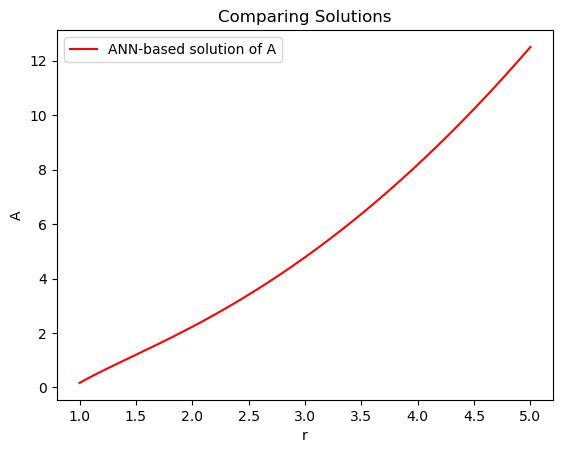

In [10]:
plt.title("Comparing Solutions")
plt.ylabel('A')
plt.xlabel('r')
plt.plot(t, y, label='ANN-based solution of A', color = 'r')
# plt.plot(t, A_an,label='Analytical solution of A', color = 'b')
plt.legend()
plt.savefig('lambda')
plt.show()